# Different Models
### Taken from https://github.com/dineshdaultani/StockPredictions
https://software.intel.com/en-us/blogs/2017/07/14/stock-predictions-through-news-sentiment-analysis

In [170]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
#nltk.download('vader_lexicon')

In [234]:
# Reading the saved data pickle file
df_stocks = pd.read_pickle('C:/Users/Owner/Documents/NewsSentimentAnalysis_StockPredictions/data_raw/pickled_twenty_year_filtered_lead_para.pkl')

In [235]:
df_stocks

close     adj close  \
2000-01-03  11357.509766  11357.509766   
2000-01-04  10997.929688  10997.929688   
2000-01-05  11122.650391  11122.650391   
2000-01-06  11253.259766  11253.259766   
2000-01-07  11522.559570  11522.559570   
...                  ...           ...   
2019-12-26  28621.390625  28621.390625   
2019-12-27  28645.259766  28645.259766   
2019-12-28  28584.220052  28584.220052   
2019-12-29  28523.180339  28523.180339   
2019-12-30  28462.140625  28462.140625   

                                                     articles  
2000-01-03  . Looking Back to Move Forward. A Touch of Spr...  
2000-01-04  . No Bones About It. Carroll and Rhodes Are Ou...  
2000-01-05  . Climate Control. With Mild Winter, Snow Busi...  
2000-01-06  . Calling All Units. Larry Bearnarth, 58, the ...  
2000-01-07  . Nature in a Flick of the Eye. Defense Chief ...  
...                                                       ...  
2019-12-26  . He is Trying to Get Fire Victims Paid. He Ha...  
2019-12-27  . 6 Bodies Recovered From Tour Helicopter Cras...  
2019-12-28  . In Protesting Climate Change, Jane Fonda Bri...  
2019-12-29  . Somali Terror Group Al Shabab Remains Resili...  
2019-12-30  . Why We Will Need Walt Whitman in 2020. The R...  

[7302 rows x 3 columns]

In [236]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [237]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [238]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
df_stocks

prices                                           articles
2000-01-03   11357   Looking Back to Move Forward. A Touch of Spri...
2000-01-04   10997   No Bones About It. Carroll and Rhodes Are Out...
2000-01-05   11122   Climate Control. With Mild Winter, Snow Busin...
2000-01-06   11253   Calling All Units. Larry Bearnarth, 58, the B...
2000-01-07   11522   Nature in a Flick of the Eye. Defense Chief P...
...            ...                                                ...
2019-12-26   28621   He is Trying to Get Fire Victims Paid. He Has...
2019-12-27   28645   6 Bodies Recovered From Tour Helicopter Crash...
2019-12-28   28584   In Protesting Climate Change, Jane Fonda Brin...
2019-12-29   28523   Somali Terror Group Al Shabab Remains Resilie...
2019-12-30   28462   Why We Will Need Walt Whitman in 2020. The Ri...

[7302 rows x 2 columns]

In [240]:
df_stocks.to_csv('C:/Users/Owner/Documents/NewsSentimentAnalysis_StockPredictions/data_raw/hhsample_interpolated_df_20_years_filtered_lead_para.csv',
                       sep=',', encoding='utf-8')

In [241]:
df = df_stocks[['prices']].copy()
df

prices
2000-01-03   11357
2000-01-04   10997
2000-01-05   11122
2000-01-06   11253
2000-01-07   11522
...            ...
2019-12-26   28621
2019-12-27   28645
2019-12-28   28584
2019-12-29   28523
2019-12-30   28462

[7302 rows x 1 columns]

In [242]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [243]:
df

prices compound neg neu pos
2000-01-03   11357                     
2000-01-04   10997                     
2000-01-05   11122                     
2000-01-06   11253                     
2000-01-07   11522                     
...            ...      ...  ..  ..  ..
2019-12-26   28621                     
2019-12-27   28645                     
2019-12-28   28584                     
2019-12-29   28523                     
2019-12-30   28462                     

[7302 rows x 5 columns]

In [244]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()

In [245]:

for date, row in df_stocks.T.iteritems():
    print(date)
    try:
        sentence = df_stocks.loc[date, 'articles']
        ss = sid.polarity_scores(sentence)
        df.at[date, 'compound']=ss['compound']
        df.at[date, 'neg']= ss['neg']
        df.at[date, 'neu']= ss['neu']
        df.at[date, 'pos']= ss['pos']
    except TypeError:
        print (df_stocks.loc[date, 'articles'])
        print (date)

2000-01-03 00:00:00
2000-01-04 00:00:00
2000-01-05 00:00:00
2000-01-06 00:00:00
2000-01-07 00:00:00
2000-01-08 00:00:00
2000-01-09 00:00:00
2000-01-10 00:00:00
2000-01-11 00:00:00
2000-01-12 00:00:00
2000-01-13 00:00:00
2000-01-14 00:00:00
2000-01-15 00:00:00
2000-01-16 00:00:00
2000-01-17 00:00:00
2000-01-18 00:00:00
2000-01-19 00:00:00
2000-01-20 00:00:00
2000-01-21 00:00:00
2000-01-22 00:00:00
2000-01-23 00:00:00
2000-01-24 00:00:00
2000-01-25 00:00:00
2000-01-26 00:00:00
2000-01-27 00:00:00
2000-01-28 00:00:00
2000-01-29 00:00:00
2000-01-30 00:00:00
2000-01-31 00:00:00
2000-02-01 00:00:00
2000-02-02 00:00:00
2000-02-03 00:00:00
2000-02-04 00:00:00
2000-02-05 00:00:00
2000-02-06 00:00:00
2000-02-07 00:00:00
2000-02-08 00:00:00
2000-02-09 00:00:00
2000-02-10 00:00:00
2000-02-11 00:00:00
2000-02-12 00:00:00
2000-02-13 00:00:00
2000-02-14 00:00:00
2000-02-15 00:00:00
2000-02-16 00:00:00
2000-02-17 00:00:00
2000-02-18 00:00:00
2000-02-19 00:00:00
2000-02-20 00:00:00
2000-02-21 00:00:00


2001-02-20 00:00:00
2001-02-21 00:00:00
2001-02-22 00:00:00
2001-02-23 00:00:00
2001-02-24 00:00:00
2001-02-25 00:00:00
2001-02-26 00:00:00
2001-02-27 00:00:00
2001-02-28 00:00:00
2001-03-01 00:00:00
2001-03-02 00:00:00
2001-03-03 00:00:00
2001-03-04 00:00:00
2001-03-05 00:00:00
2001-03-06 00:00:00
2001-03-07 00:00:00
2001-03-08 00:00:00
2001-03-09 00:00:00
2001-03-10 00:00:00
2001-03-11 00:00:00
2001-03-12 00:00:00
2001-03-13 00:00:00
2001-03-14 00:00:00
2001-03-15 00:00:00
2001-03-16 00:00:00
2001-03-17 00:00:00
2001-03-18 00:00:00
2001-03-19 00:00:00
2001-03-20 00:00:00
2001-03-21 00:00:00
2001-03-22 00:00:00
2001-03-23 00:00:00
2001-03-24 00:00:00
2001-03-25 00:00:00
2001-03-26 00:00:00
2001-03-27 00:00:00
2001-03-28 00:00:00
2001-03-29 00:00:00
2001-03-30 00:00:00
2001-03-31 00:00:00
2001-04-01 00:00:00
2001-04-02 00:00:00
2001-04-03 00:00:00
2001-04-04 00:00:00
2001-04-05 00:00:00
2001-04-06 00:00:00
2001-04-07 00:00:00
2001-04-08 00:00:00
2001-04-09 00:00:00
2001-04-10 00:00:00


2002-04-07 00:00:00
2002-04-08 00:00:00
2002-04-09 00:00:00
2002-04-10 00:00:00
2002-04-11 00:00:00
2002-04-12 00:00:00
2002-04-13 00:00:00
2002-04-14 00:00:00
2002-04-15 00:00:00
2002-04-16 00:00:00
2002-04-17 00:00:00
2002-04-18 00:00:00
2002-04-19 00:00:00
2002-04-20 00:00:00
2002-04-21 00:00:00
2002-04-22 00:00:00
2002-04-23 00:00:00
2002-04-24 00:00:00
2002-04-25 00:00:00
2002-04-26 00:00:00
2002-04-27 00:00:00
2002-04-28 00:00:00
2002-04-29 00:00:00
2002-04-30 00:00:00
2002-05-01 00:00:00
2002-05-02 00:00:00
2002-05-03 00:00:00
2002-05-04 00:00:00
2002-05-05 00:00:00
2002-05-06 00:00:00
2002-05-07 00:00:00
2002-05-08 00:00:00
2002-05-09 00:00:00
2002-05-10 00:00:00
2002-05-11 00:00:00
2002-05-12 00:00:00
2002-05-13 00:00:00
2002-05-14 00:00:00
2002-05-15 00:00:00
2002-05-16 00:00:00
2002-05-17 00:00:00
2002-05-18 00:00:00
2002-05-19 00:00:00
2002-05-20 00:00:00
2002-05-21 00:00:00
2002-05-22 00:00:00
2002-05-23 00:00:00
2002-05-24 00:00:00
2002-05-25 00:00:00
2002-05-26 00:00:00


2003-05-22 00:00:00
2003-05-23 00:00:00
2003-05-24 00:00:00
2003-05-25 00:00:00
2003-05-26 00:00:00
2003-05-27 00:00:00
2003-05-28 00:00:00
2003-05-29 00:00:00
2003-05-30 00:00:00
2003-05-31 00:00:00
2003-06-01 00:00:00
2003-06-02 00:00:00
2003-06-03 00:00:00
2003-06-04 00:00:00
2003-06-05 00:00:00
2003-06-06 00:00:00
2003-06-07 00:00:00
2003-06-08 00:00:00
2003-06-09 00:00:00
2003-06-10 00:00:00
2003-06-11 00:00:00
2003-06-12 00:00:00
2003-06-13 00:00:00
2003-06-14 00:00:00
2003-06-15 00:00:00
2003-06-16 00:00:00
2003-06-17 00:00:00
2003-06-18 00:00:00
2003-06-19 00:00:00
2003-06-20 00:00:00
2003-06-21 00:00:00
2003-06-22 00:00:00
2003-06-23 00:00:00
2003-06-24 00:00:00
2003-06-25 00:00:00
2003-06-26 00:00:00
2003-06-27 00:00:00
2003-06-28 00:00:00
2003-06-29 00:00:00
2003-06-30 00:00:00
2003-07-01 00:00:00
2003-07-02 00:00:00
2003-07-03 00:00:00
2003-07-04 00:00:00
2003-07-05 00:00:00
2003-07-06 00:00:00
2003-07-07 00:00:00
2003-07-08 00:00:00
2003-07-09 00:00:00
2003-07-10 00:00:00


2004-07-06 00:00:00
2004-07-07 00:00:00
2004-07-08 00:00:00
2004-07-09 00:00:00
2004-07-10 00:00:00
2004-07-11 00:00:00
2004-07-12 00:00:00
2004-07-13 00:00:00
2004-07-14 00:00:00
2004-07-15 00:00:00
2004-07-16 00:00:00
2004-07-17 00:00:00
2004-07-18 00:00:00
2004-07-19 00:00:00
2004-07-20 00:00:00
2004-07-21 00:00:00
2004-07-22 00:00:00
2004-07-23 00:00:00
2004-07-24 00:00:00
2004-07-25 00:00:00
2004-07-26 00:00:00
2004-07-27 00:00:00
2004-07-28 00:00:00
2004-07-29 00:00:00
2004-07-30 00:00:00
2004-07-31 00:00:00
2004-08-01 00:00:00
2004-08-02 00:00:00
2004-08-03 00:00:00
2004-08-04 00:00:00
2004-08-05 00:00:00
2004-08-06 00:00:00
2004-08-07 00:00:00
2004-08-08 00:00:00
2004-08-09 00:00:00
2004-08-10 00:00:00
2004-08-11 00:00:00
2004-08-12 00:00:00
2004-08-13 00:00:00
2004-08-14 00:00:00
2004-08-15 00:00:00
2004-08-16 00:00:00
2004-08-17 00:00:00
2004-08-18 00:00:00
2004-08-19 00:00:00
2004-08-20 00:00:00
2004-08-21 00:00:00
2004-08-22 00:00:00
2004-08-23 00:00:00
2004-08-24 00:00:00


2005-08-27 00:00:00
2005-08-28 00:00:00
2005-08-29 00:00:00
2005-08-30 00:00:00
2005-08-31 00:00:00
2005-09-01 00:00:00
2005-09-02 00:00:00
2005-09-03 00:00:00
2005-09-04 00:00:00
2005-09-05 00:00:00
2005-09-06 00:00:00
2005-09-07 00:00:00
2005-09-08 00:00:00
2005-09-09 00:00:00
2005-09-10 00:00:00
2005-09-11 00:00:00
2005-09-12 00:00:00
2005-09-13 00:00:00
2005-09-14 00:00:00
2005-09-15 00:00:00
2005-09-16 00:00:00
2005-09-17 00:00:00
2005-09-18 00:00:00
2005-09-19 00:00:00
2005-09-20 00:00:00
2005-09-21 00:00:00
2005-09-22 00:00:00
2005-09-23 00:00:00
2005-09-24 00:00:00
2005-09-25 00:00:00
2005-09-26 00:00:00
2005-09-27 00:00:00
2005-09-28 00:00:00
2005-09-29 00:00:00
2005-09-30 00:00:00
2005-10-01 00:00:00
2005-10-02 00:00:00
2005-10-03 00:00:00
2005-10-04 00:00:00
2005-10-05 00:00:00
2005-10-06 00:00:00
2005-10-07 00:00:00
2005-10-08 00:00:00
2005-10-09 00:00:00
2005-10-10 00:00:00
2005-10-11 00:00:00
2005-10-12 00:00:00
2005-10-13 00:00:00
2005-10-14 00:00:00
2005-10-15 00:00:00


2006-10-14 00:00:00
2006-10-15 00:00:00
2006-10-16 00:00:00
2006-10-17 00:00:00
2006-10-18 00:00:00
2006-10-19 00:00:00
2006-10-20 00:00:00
2006-10-21 00:00:00
2006-10-22 00:00:00
2006-10-23 00:00:00
2006-10-24 00:00:00
2006-10-25 00:00:00
2006-10-26 00:00:00
2006-10-27 00:00:00
2006-10-28 00:00:00
2006-10-29 00:00:00
2006-10-30 00:00:00
2006-10-31 00:00:00
2006-11-01 00:00:00
2006-11-02 00:00:00
2006-11-03 00:00:00
2006-11-04 00:00:00
2006-11-05 00:00:00
2006-11-06 00:00:00
2006-11-07 00:00:00
2006-11-08 00:00:00
2006-11-09 00:00:00
2006-11-10 00:00:00
2006-11-11 00:00:00
2006-11-12 00:00:00
2006-11-13 00:00:00
2006-11-14 00:00:00
2006-11-15 00:00:00
2006-11-16 00:00:00
2006-11-17 00:00:00
2006-11-18 00:00:00
2006-11-19 00:00:00
2006-11-20 00:00:00
2006-11-21 00:00:00
2006-11-22 00:00:00
2006-11-23 00:00:00
2006-11-24 00:00:00
2006-11-25 00:00:00
2006-11-26 00:00:00
2006-11-27 00:00:00
2006-11-28 00:00:00
2006-11-29 00:00:00
2006-11-30 00:00:00
2006-12-01 00:00:00
2006-12-02 00:00:00


2007-12-02 00:00:00
2007-12-03 00:00:00
2007-12-04 00:00:00
2007-12-05 00:00:00
2007-12-06 00:00:00
2007-12-07 00:00:00
2007-12-08 00:00:00
2007-12-09 00:00:00
2007-12-10 00:00:00
2007-12-11 00:00:00
2007-12-12 00:00:00
2007-12-13 00:00:00
2007-12-14 00:00:00
2007-12-15 00:00:00
2007-12-16 00:00:00
2007-12-17 00:00:00
2007-12-18 00:00:00
2007-12-19 00:00:00
2007-12-20 00:00:00
2007-12-21 00:00:00
2007-12-22 00:00:00
2007-12-23 00:00:00
2007-12-24 00:00:00
2007-12-25 00:00:00
2007-12-26 00:00:00
2007-12-27 00:00:00
2007-12-28 00:00:00
2007-12-29 00:00:00
2007-12-30 00:00:00
2007-12-31 00:00:00
2008-01-01 00:00:00
2008-01-02 00:00:00
2008-01-03 00:00:00
2008-01-04 00:00:00
2008-01-05 00:00:00
2008-01-06 00:00:00
2008-01-07 00:00:00
2008-01-08 00:00:00
2008-01-09 00:00:00
2008-01-10 00:00:00
2008-01-11 00:00:00
2008-01-12 00:00:00
2008-01-13 00:00:00
2008-01-14 00:00:00
2008-01-15 00:00:00
2008-01-16 00:00:00
2008-01-17 00:00:00
2008-01-18 00:00:00
2008-01-19 00:00:00
2008-01-20 00:00:00


2009-01-15 00:00:00
2009-01-16 00:00:00
2009-01-17 00:00:00
2009-01-18 00:00:00
2009-01-19 00:00:00
2009-01-20 00:00:00
2009-01-21 00:00:00
2009-01-22 00:00:00
2009-01-23 00:00:00
2009-01-24 00:00:00
2009-01-25 00:00:00
2009-01-26 00:00:00
2009-01-27 00:00:00
2009-01-28 00:00:00
2009-01-29 00:00:00
2009-01-30 00:00:00
2009-01-31 00:00:00
2009-02-01 00:00:00
2009-02-02 00:00:00
2009-02-03 00:00:00
2009-02-04 00:00:00
2009-02-05 00:00:00
2009-02-06 00:00:00
2009-02-07 00:00:00
2009-02-08 00:00:00
2009-02-09 00:00:00
2009-02-10 00:00:00
2009-02-11 00:00:00
2009-02-12 00:00:00
2009-02-13 00:00:00
2009-02-14 00:00:00
2009-02-15 00:00:00
2009-02-16 00:00:00
2009-02-17 00:00:00
2009-02-18 00:00:00
2009-02-19 00:00:00
2009-02-20 00:00:00
2009-02-21 00:00:00
2009-02-22 00:00:00
2009-02-23 00:00:00
2009-02-24 00:00:00
2009-02-25 00:00:00
2009-02-26 00:00:00
2009-02-27 00:00:00
2009-02-28 00:00:00
2009-03-01 00:00:00
2009-03-02 00:00:00
2009-03-03 00:00:00
2009-03-04 00:00:00
2009-03-05 00:00:00


2010-03-04 00:00:00
2010-03-05 00:00:00
2010-03-06 00:00:00
2010-03-07 00:00:00
2010-03-08 00:00:00
2010-03-09 00:00:00
2010-03-10 00:00:00
2010-03-11 00:00:00
2010-03-12 00:00:00
2010-03-13 00:00:00
2010-03-14 00:00:00
2010-03-15 00:00:00
2010-03-16 00:00:00
2010-03-17 00:00:00
2010-03-18 00:00:00
2010-03-19 00:00:00
2010-03-20 00:00:00
2010-03-21 00:00:00
2010-03-22 00:00:00
2010-03-23 00:00:00
2010-03-24 00:00:00
2010-03-25 00:00:00
2010-03-26 00:00:00
2010-03-27 00:00:00
2010-03-28 00:00:00
2010-03-29 00:00:00
2010-03-30 00:00:00
2010-03-31 00:00:00
2010-04-01 00:00:00
2010-04-02 00:00:00
2010-04-03 00:00:00
2010-04-04 00:00:00
2010-04-05 00:00:00
2010-04-06 00:00:00
2010-04-07 00:00:00
2010-04-08 00:00:00
2010-04-09 00:00:00
2010-04-10 00:00:00
2010-04-11 00:00:00
2010-04-12 00:00:00
2010-04-13 00:00:00
2010-04-14 00:00:00
2010-04-15 00:00:00
2010-04-16 00:00:00
2010-04-17 00:00:00
2010-04-18 00:00:00
2010-04-19 00:00:00
2010-04-20 00:00:00
2010-04-21 00:00:00
2010-04-22 00:00:00


2011-04-21 00:00:00
2011-04-22 00:00:00
2011-04-23 00:00:00
2011-04-24 00:00:00
2011-04-25 00:00:00
2011-04-26 00:00:00
2011-04-27 00:00:00
2011-04-28 00:00:00
2011-04-29 00:00:00
2011-04-30 00:00:00
2011-05-01 00:00:00
2011-05-02 00:00:00
2011-05-03 00:00:00
2011-05-04 00:00:00
2011-05-05 00:00:00
2011-05-06 00:00:00
2011-05-07 00:00:00
2011-05-08 00:00:00
2011-05-09 00:00:00
2011-05-10 00:00:00
2011-05-11 00:00:00
2011-05-12 00:00:00
2011-05-13 00:00:00
2011-05-14 00:00:00
2011-05-15 00:00:00
2011-05-16 00:00:00
2011-05-17 00:00:00
2011-05-18 00:00:00
2011-05-19 00:00:00
2011-05-20 00:00:00
2011-05-21 00:00:00
2011-05-22 00:00:00
2011-05-23 00:00:00
2011-05-24 00:00:00
2011-05-25 00:00:00
2011-05-26 00:00:00
2011-05-27 00:00:00
2011-05-28 00:00:00
2011-05-29 00:00:00
2011-05-30 00:00:00
2011-05-31 00:00:00
2011-06-01 00:00:00
2011-06-02 00:00:00
2011-06-03 00:00:00
2011-06-04 00:00:00
2011-06-05 00:00:00
2011-06-06 00:00:00
2011-06-07 00:00:00
2011-06-08 00:00:00
2011-06-09 00:00:00


2012-06-04 00:00:00
2012-06-05 00:00:00
2012-06-06 00:00:00
2012-06-07 00:00:00
2012-06-08 00:00:00
2012-06-09 00:00:00
2012-06-10 00:00:00
2012-06-11 00:00:00
2012-06-12 00:00:00
2012-06-13 00:00:00
2012-06-14 00:00:00
2012-06-15 00:00:00
2012-06-16 00:00:00
2012-06-17 00:00:00
2012-06-18 00:00:00
2012-06-19 00:00:00
2012-06-20 00:00:00
2012-06-21 00:00:00
2012-06-22 00:00:00
2012-06-23 00:00:00
2012-06-24 00:00:00
2012-06-25 00:00:00
2012-06-26 00:00:00
2012-06-27 00:00:00
2012-06-28 00:00:00
2012-06-29 00:00:00
2012-06-30 00:00:00
2012-07-01 00:00:00
2012-07-02 00:00:00
2012-07-03 00:00:00
2012-07-04 00:00:00
2012-07-05 00:00:00
2012-07-06 00:00:00
2012-07-07 00:00:00
2012-07-08 00:00:00
2012-07-09 00:00:00
2012-07-10 00:00:00
2012-07-11 00:00:00
2012-07-12 00:00:00
2012-07-13 00:00:00
2012-07-14 00:00:00
2012-07-15 00:00:00
2012-07-16 00:00:00
2012-07-17 00:00:00
2012-07-18 00:00:00
2012-07-19 00:00:00
2012-07-20 00:00:00
2012-07-21 00:00:00
2012-07-22 00:00:00
2012-07-23 00:00:00


2013-07-20 00:00:00
2013-07-21 00:00:00
2013-07-22 00:00:00
2013-07-23 00:00:00
2013-07-24 00:00:00
2013-07-25 00:00:00
2013-07-26 00:00:00
2013-07-27 00:00:00
2013-07-28 00:00:00
2013-07-29 00:00:00
2013-07-30 00:00:00
2013-07-31 00:00:00
2013-08-01 00:00:00
2013-08-02 00:00:00
2013-08-03 00:00:00
2013-08-04 00:00:00
2013-08-05 00:00:00
2013-08-06 00:00:00
2013-08-07 00:00:00
2013-08-08 00:00:00
2013-08-09 00:00:00
2013-08-10 00:00:00
2013-08-11 00:00:00
2013-08-12 00:00:00
2013-08-13 00:00:00
2013-08-14 00:00:00
2013-08-15 00:00:00
2013-08-16 00:00:00
2013-08-17 00:00:00
2013-08-18 00:00:00
2013-08-19 00:00:00
2013-08-20 00:00:00
2013-08-21 00:00:00
2013-08-22 00:00:00
2013-08-23 00:00:00
2013-08-24 00:00:00
2013-08-25 00:00:00
2013-08-26 00:00:00
2013-08-27 00:00:00
2013-08-28 00:00:00
2013-08-29 00:00:00
2013-08-30 00:00:00
2013-08-31 00:00:00
2013-09-01 00:00:00
2013-09-02 00:00:00
2013-09-03 00:00:00
2013-09-04 00:00:00
2013-09-05 00:00:00
2013-09-06 00:00:00
2013-09-07 00:00:00


2014-09-03 00:00:00
2014-09-04 00:00:00
2014-09-05 00:00:00
2014-09-06 00:00:00
2014-09-07 00:00:00
2014-09-08 00:00:00
2014-09-09 00:00:00
2014-09-10 00:00:00
2014-09-11 00:00:00
2014-09-12 00:00:00
2014-09-13 00:00:00
2014-09-14 00:00:00
2014-09-15 00:00:00
2014-09-16 00:00:00
2014-09-17 00:00:00
2014-09-18 00:00:00
2014-09-19 00:00:00
2014-09-20 00:00:00
2014-09-21 00:00:00
2014-09-22 00:00:00
2014-09-23 00:00:00
2014-09-24 00:00:00
2014-09-25 00:00:00
2014-09-26 00:00:00
2014-09-27 00:00:00
2014-09-28 00:00:00
2014-09-29 00:00:00
2014-09-30 00:00:00
2014-10-01 00:00:00
2014-10-02 00:00:00
2014-10-03 00:00:00
2014-10-04 00:00:00
2014-10-05 00:00:00
2014-10-06 00:00:00
2014-10-07 00:00:00
2014-10-08 00:00:00
2014-10-09 00:00:00
2014-10-10 00:00:00
2014-10-11 00:00:00
2014-10-12 00:00:00
2014-10-13 00:00:00
2014-10-14 00:00:00
2014-10-15 00:00:00
2014-10-16 00:00:00
2014-10-17 00:00:00
2014-10-18 00:00:00
2014-10-19 00:00:00
2014-10-20 00:00:00
2014-10-21 00:00:00
2014-10-22 00:00:00


2015-10-20 00:00:00
2015-10-21 00:00:00
2015-10-22 00:00:00
2015-10-23 00:00:00
2015-10-24 00:00:00
2015-10-25 00:00:00
2015-10-26 00:00:00
2015-10-27 00:00:00
2015-10-28 00:00:00
2015-10-29 00:00:00
2015-10-30 00:00:00
2015-10-31 00:00:00
2015-11-01 00:00:00
2015-11-02 00:00:00
2015-11-03 00:00:00
2015-11-04 00:00:00
2015-11-05 00:00:00
2015-11-06 00:00:00
2015-11-07 00:00:00
2015-11-08 00:00:00
2015-11-09 00:00:00
2015-11-10 00:00:00
2015-11-11 00:00:00
2015-11-12 00:00:00
2015-11-13 00:00:00
2015-11-14 00:00:00
2015-11-15 00:00:00
2015-11-16 00:00:00
2015-11-17 00:00:00
2015-11-18 00:00:00
2015-11-19 00:00:00
2015-11-20 00:00:00
2015-11-21 00:00:00
2015-11-22 00:00:00
2015-11-23 00:00:00
2015-11-24 00:00:00
2015-11-25 00:00:00
2015-11-26 00:00:00
2015-11-27 00:00:00
2015-11-28 00:00:00
2015-11-29 00:00:00
2015-11-30 00:00:00
2015-12-01 00:00:00
2015-12-02 00:00:00
2015-12-03 00:00:00
2015-12-04 00:00:00
2015-12-05 00:00:00
2015-12-06 00:00:00
2015-12-07 00:00:00
2015-12-08 00:00:00


2016-12-10 00:00:00
2016-12-11 00:00:00
2016-12-12 00:00:00
2016-12-13 00:00:00
2016-12-14 00:00:00
2016-12-15 00:00:00
2016-12-16 00:00:00
2016-12-17 00:00:00
2016-12-18 00:00:00
2016-12-19 00:00:00
2016-12-20 00:00:00
2016-12-21 00:00:00
2016-12-22 00:00:00
2016-12-23 00:00:00
2016-12-24 00:00:00
2016-12-25 00:00:00
2016-12-26 00:00:00
2016-12-27 00:00:00
2016-12-28 00:00:00
2016-12-29 00:00:00
2016-12-30 00:00:00
2016-12-31 00:00:00
2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-14 00:00:00
2017-01-15 00:00:00
2017-01-16 00:00:00
2017-01-17 00:00:00
2017-01-18 00:00:00
2017-01-19 00:00:00
2017-01-20 00:00:00
2017-01-21 00:00:00
2017-01-22 00:00:00
2017-01-23 00:00:00
2017-01-24 00:00:00
2017-01-25 00:00:00
2017-01-26 00:00:00
2017-01-27 00:00:00
2017-01-28 00:00:00


2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00
2018-02-20 00:00:00
2018-02-21 00:00:00
2018-02-22 00:00:00
2018-02-23 00:00:00
2018-02-24 00:00:00
2018-02-25 00:00:00
2018-02-26 00:00:00
2018-02-27 00:00:00
2018-02-28 00:00:00
2018-03-01 00:00:00
2018-03-02 00:00:00
2018-03-03 00:00:00
2018-03-04 00:00:00
2018-03-05 00:00:00
2018-03-06 00:00:00
2018-03-07 00:00:00
2018-03-08 00:00:00
2018-03-09 00:00:00
2018-03-10 00:00:00
2018-03-11 00:00:00
2018-03-12 00:00:00
2018-03-13 00:00:00
2018-03-14 00:00:00
2018-03-15 00:00:00


2019-03-15 00:00:00
2019-03-16 00:00:00
2019-03-17 00:00:00
2019-03-18 00:00:00
2019-03-19 00:00:00
2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-23 00:00:00
2019-03-24 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-03-30 00:00:00
2019-03-31 00:00:00
2019-04-01 00:00:00
2019-04-02 00:00:00
2019-04-03 00:00:00
2019-04-04 00:00:00
2019-04-05 00:00:00
2019-04-06 00:00:00
2019-04-07 00:00:00
2019-04-08 00:00:00
2019-04-09 00:00:00
2019-04-10 00:00:00
2019-04-11 00:00:00
2019-04-12 00:00:00
2019-04-13 00:00:00
2019-04-14 00:00:00
2019-04-15 00:00:00
2019-04-16 00:00:00
2019-04-17 00:00:00
2019-04-18 00:00:00
2019-04-19 00:00:00
2019-04-20 00:00:00
2019-04-21 00:00:00
2019-04-22 00:00:00
2019-04-23 00:00:00
2019-04-24 00:00:00
2019-04-25 00:00:00
2019-04-26 00:00:00
2019-04-27 00:00:00
2019-04-28 00:00:00
2019-04-29 00:00:00
2019-04-30 00:00:00
2019-05-01 00:00:00
2019-05-02 00:00:00
2019-05-03 00:00:00


In [246]:
# sentence = 'paris shootout police officer suspected guman dead'
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata
# sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(sentence)
ss

{'neg': 0.157, 'neu': 0.809, 'pos': 0.034, 'compound': -0.8658}

In [247]:
df

prices compound    neg    neu    pos
2000-01-03   11357  -0.6232  0.089  0.823  0.088
2000-01-04   10997  -0.9874  0.072  0.882  0.046
2000-01-05   11122  -0.9477  0.104  0.799  0.097
2000-01-06   11253  -0.2642  0.093  0.811  0.096
2000-01-07   11522   0.7436  0.093  0.808    0.1
...            ...      ...    ...    ...    ...
2019-12-26   28621  -0.9685  0.138  0.782   0.08
2019-12-27   28645  -0.9987   0.23  0.679  0.091
2019-12-28   28584  -0.9941  0.222  0.718   0.06
2019-12-29   28523  -0.9845  0.207  0.658  0.135
2019-12-30   28462  -0.8658  0.157  0.809  0.034

[7302 rows x 5 columns]

In [248]:
train_start_date = '2000-01-01'
train_end_date = '2015-12-31'
test_start_date = '2016-01-01'
test_end_date = '2019-12-30'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [249]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [250]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [251]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [252]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\Owner\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [253]:
print (rf.feature_importances_)

[0.50484699 0.49515301]


In [254]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [255]:
prediction

array([[10814.26216667],
       [11909.00909524],
       [16664.91      ],
       ...,
       [ 9662.03      ],
       [ 9800.62      ],
       [12880.8       ]])

In [256]:

contributions

array([[  366.6523898 , -1410.55592666],
       [  411.56870321,  -360.7253115 ],
       [ 3554.092976  ,  1252.65132048],
       ...,
       [-1101.41040781, -1094.72529572],
       [-2574.16524788,   516.61954436],
       [  652.92584264,   369.70845383]])

In [257]:

import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [259]:

predictions_df

prices
2016-01-01  10814.262167
2016-01-02  11909.009095
2016-01-03  16664.910000
2016-01-04  11011.520000
2016-01-05  11600.570000
...                  ...
2019-12-26  11034.462405
2019-12-27  13292.966667
2019-12-28   9662.030000
2019-12-29   9800.620000
2019-12-30  12880.800000

[1460 rows x 1 columns]

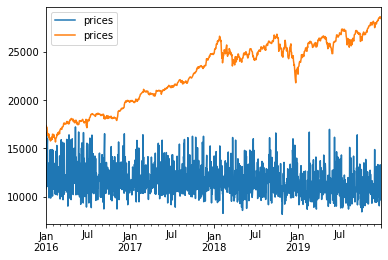

In [260]:
#predictions_df.plot() 
#test['prices'].plot()

predictions_plot = predictions_df.plot()

fig = y_test.plot(ax = predictions_plot).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

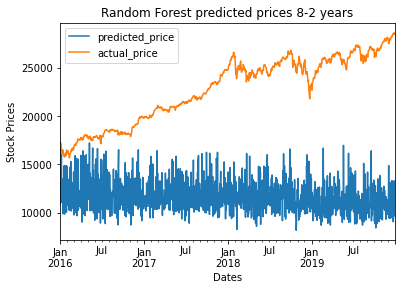

In [261]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

# colors = ['332288', '88CCEE', '44AA99', '117733', '999933', 'DDCC77', 'CC6677', '882255', 'AA4499']

## Increasing the prices by a constant value so that it represents closing price during the testing

In [262]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print (average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print (temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print (average_upcoming_5_days_predicted)
#average train.loc['2013-12-31', 'prices'] - advpredictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print (difference_test_predicted_prices)

16867.5
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
12912.727309523809
3954.772690476191


In [263]:
predictions_df

prices
2016-01-01  10814.262167
2016-01-02  11909.009095
2016-01-03  16664.910000
2016-01-04  11011.520000
2016-01-05  11600.570000
...                  ...
2019-12-26  11034.462405
2019-12-27  13292.966667
2019-12-28   9662.030000
2019-12-29   9800.620000
2019-12-30  12880.800000

[1460 rows x 1 columns]

In [264]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

prices
2016-01-01  14769.034857
2016-01-02  15863.781786
2016-01-03  20619.682690
2016-01-04  14966.292690
2016-01-05  15555.342690
...                  ...
2019-12-26  14989.235095
2019-12-27  17247.739357
2019-12-28  13616.802690
2019-12-29  13755.392690
2019-12-30  16835.572690

[1460 rows x 1 columns]

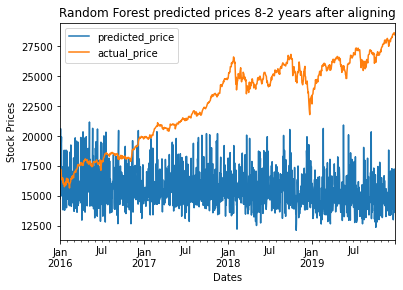

In [265]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest with aligning.png")

## Smoothing the time series data
## Applying EWMA pandas to smooth the stock prices

In [266]:
predictions_df

prices
2016-01-01  14769.034857
2016-01-02  15863.781786
2016-01-03  20619.682690
2016-01-04  14966.292690
2016-01-05  15555.342690
...                  ...
2019-12-26  14989.235095
2019-12-27  17247.739357
2019-12-28  13616.802690
2019-12-29  13755.392690
2019-12-30  16835.572690

[1460 rows x 1 columns]

In [267]:
predictions_df['ewma'] = predictions_df["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()

In [268]:
predictions_df

prices          ewma
2016-01-01  14769.034857  14769.034857
2016-01-02  15863.781786  15325.531213
2016-01-03  20619.682690  17149.393600
2016-01-04  14966.292690  16576.031539
2016-01-05  15555.342690  16358.061657
...                  ...           ...
2019-12-26  14989.235095  14874.936343
2019-12-27  17247.739357  14952.733163
2019-12-28  13616.802690  14908.932164
2019-12-29  13755.392690  14871.111198
2019-12-30  16835.572690  14935.519771

[1460 rows x 2 columns]

In [269]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()

In [270]:

predictions_df

prices          ewma  actual_value  actual_value_ewma
2016-01-01  14769.034857  14769.034857         17356       17356.000000
2016-01-02  15863.781786  15325.531213         17286       17320.416667
2016-01-03  20619.682690  17149.393600         17217       17284.789094
2016-01-04  14966.292690  16576.031539         17148       17248.863280
2016-01-05  15555.342690  16358.061657         17158       17229.459268
...                  ...           ...           ...                ...
2019-12-26  14989.235095  14874.936343         28621       27895.822542
2019-12-27  17247.739357  14952.733163         28645       27920.385738
2019-12-28  13616.802690  14908.932164         28584       27942.143582
2019-12-29  13755.392690  14871.111198         28523       27961.188055
2019-12-30  16835.572690  14935.519771         28462       27977.608119

[1460 rows x 4 columns]

In [271]:
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

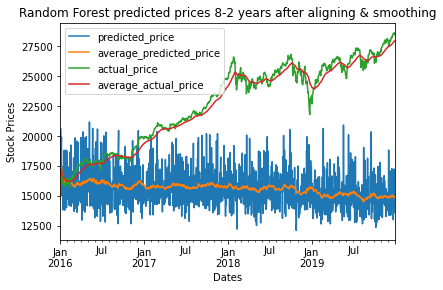

In [272]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing.png")

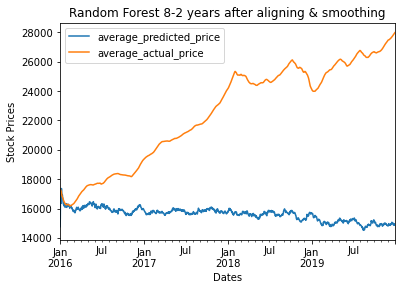

In [273]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing 2.png")

## Increasing the prices by a constant value so that it represents closing price during the testing

In [274]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

## LogisticRegression

In [283]:
from sklearn import metrics
from statistics import mean
import math
mae_vals=[]
rmse_vals=[]
r2_vals=[]

C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.py

248.14952054922153 287.47301568071407 -2.2696032136432684


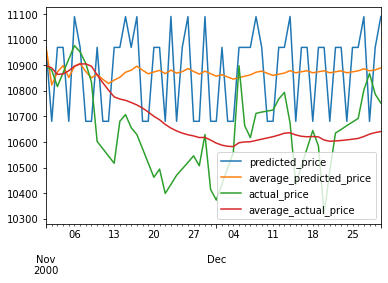

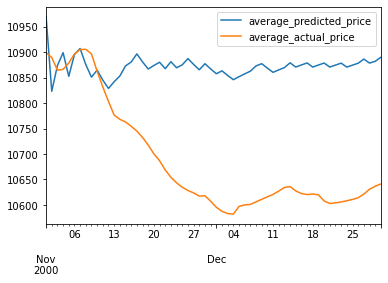

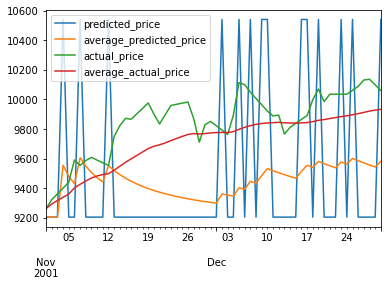

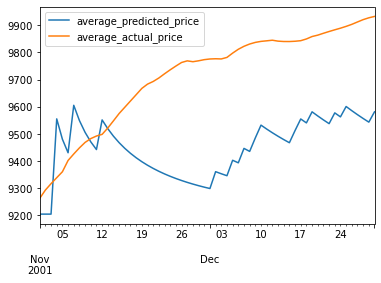

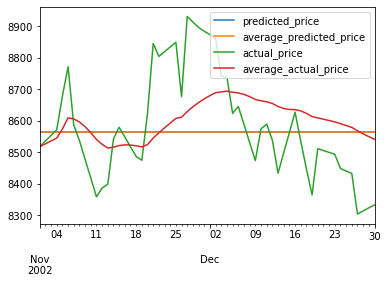

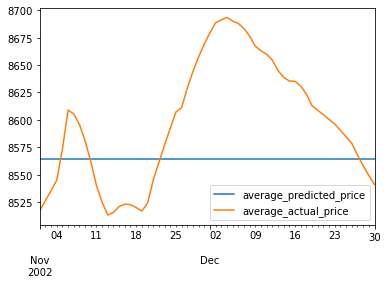

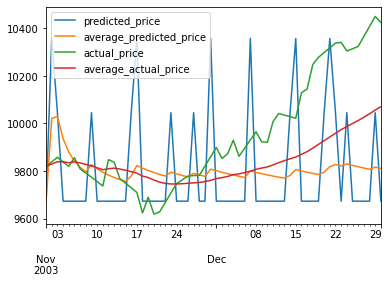

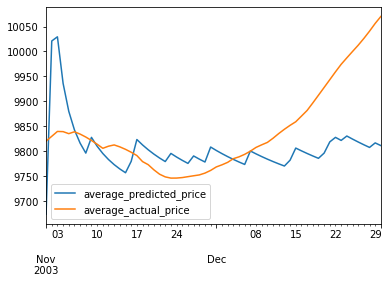

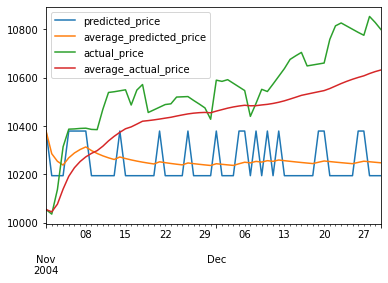

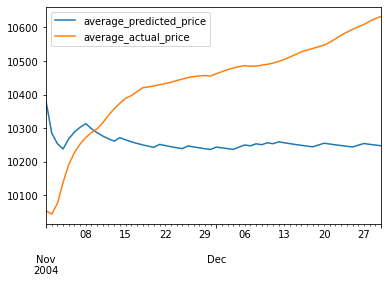

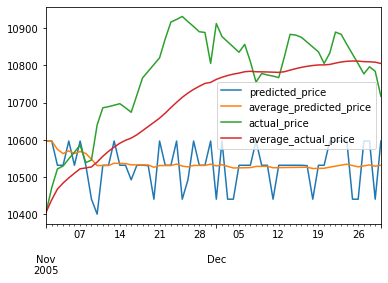

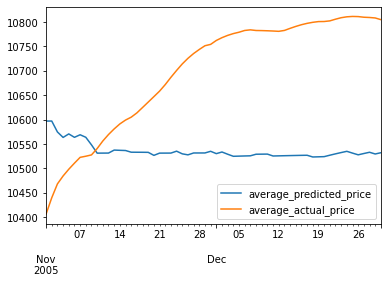

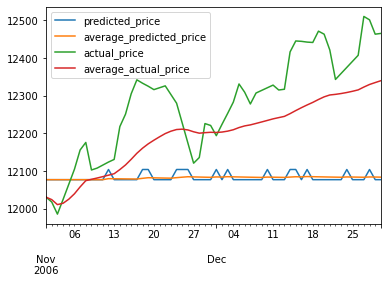

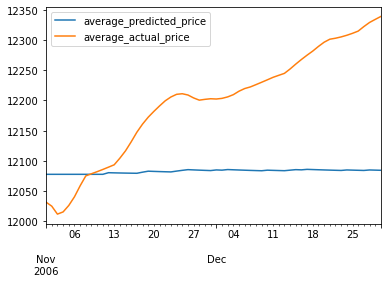

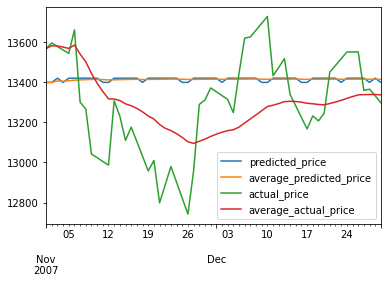

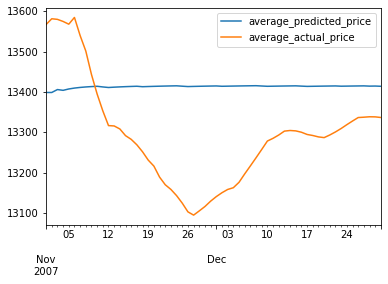

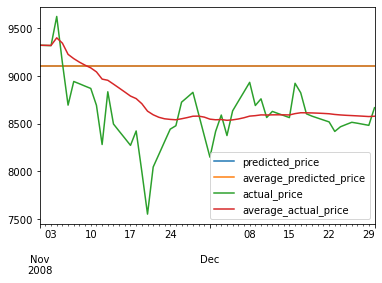

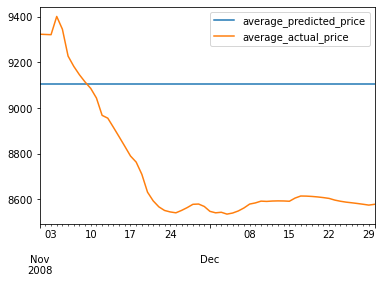

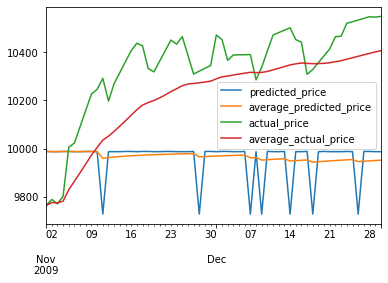

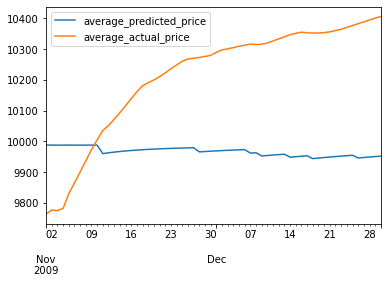

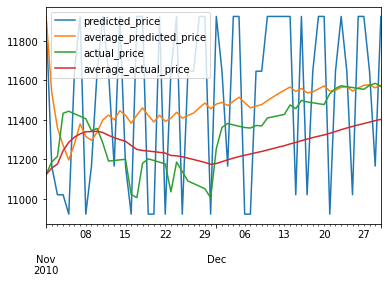

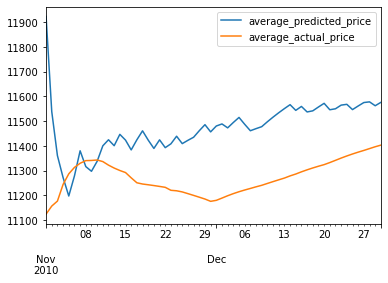

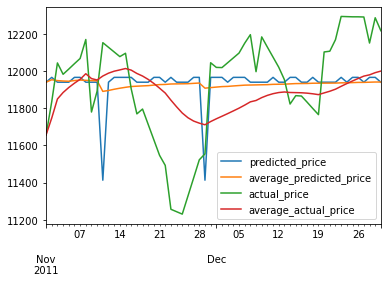

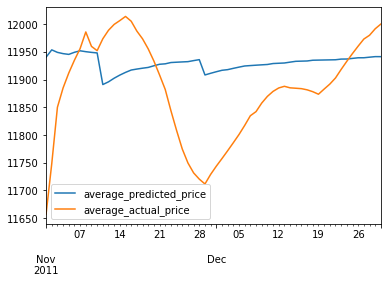

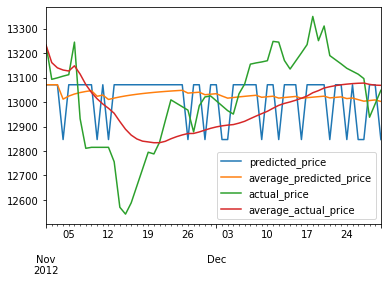

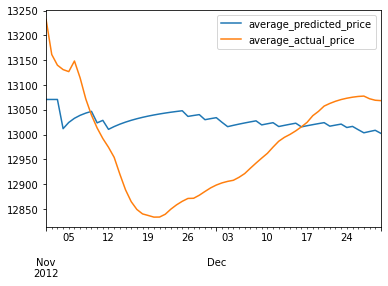

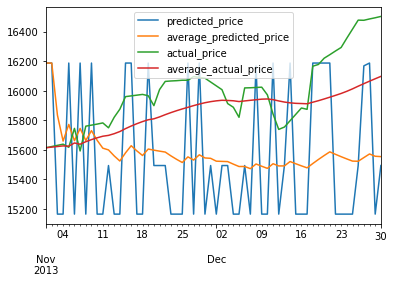

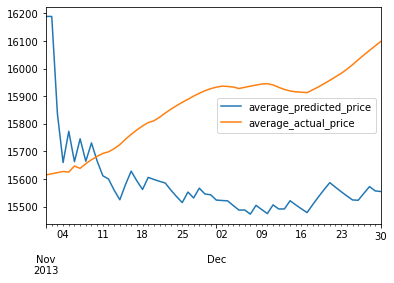

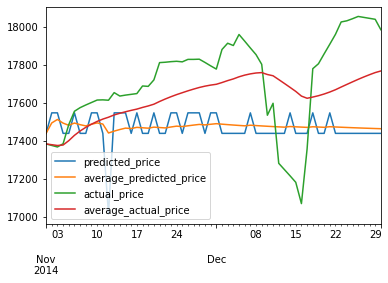

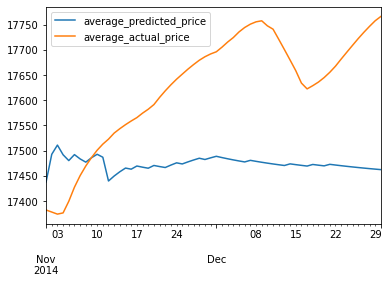

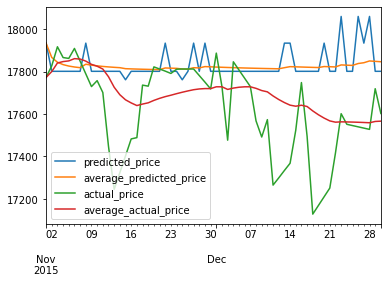

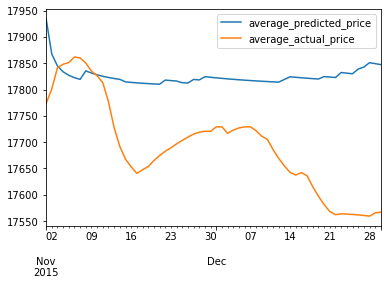

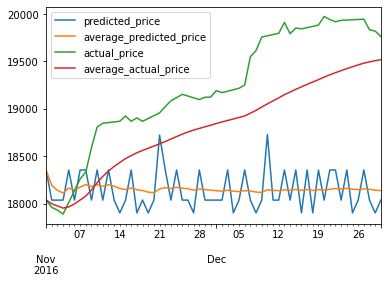

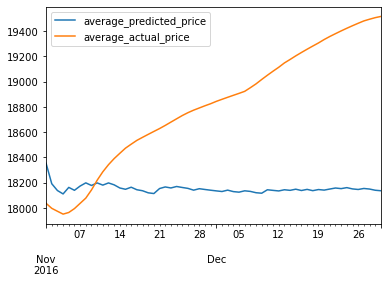

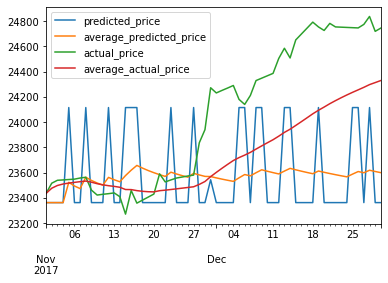

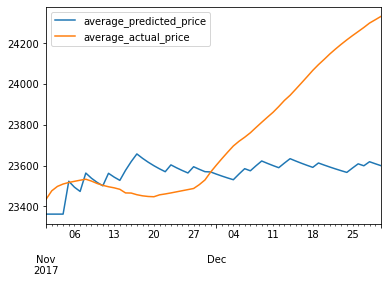

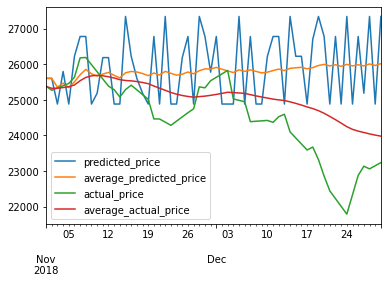

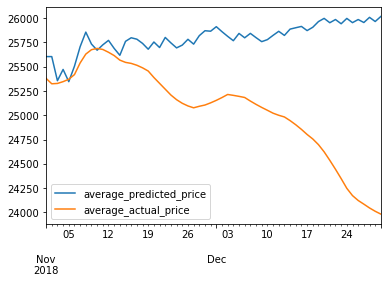

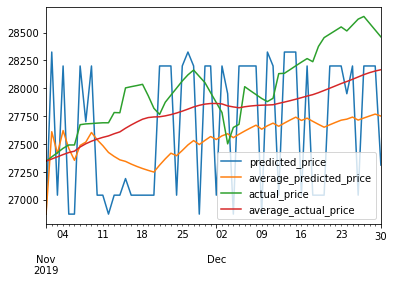

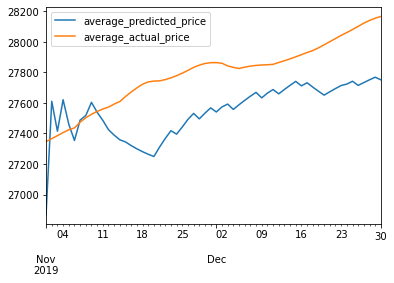

In [301]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
mae=[]
rmse=[]
r2=[]
for year in years:
    # Splitting the training and testing data
    #3CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-08-31'
    test_start_date = str(year) + '-09-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #6CV
    
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    #12CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-11-30'
    test_start_date = str(year) + '-12-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    

    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
    #print (str(year),prediction,test['prices'])
    #print(predictions_df_list['average_predicted_price']-predictions_df_list['average_actual_price'])
    mae.append(metrics.mean_absolute_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    rmse.append(math.sqrt(metrics.mean_squared_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price'])))
    r2.append(metrics.r2_score(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    #print("hi")
    
#     predictions_df_list.show()
maeFinal=mean(mae)
rmseFinal=mean(rmse)
r2Final=mean(r2)
print(maeFinal,rmseFinal,r2Final)
mae_vals.append(maeFinal)
rmse_vals.append(rmseFinal)
r2_vals.append(r2Final)

In [288]:
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'LogisticRegression': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

In [302]:
lr.classes_

array([22686, 23336, 23346, 23433, 23465, 23498, 23531, 23787, 23879,
       23909, 23938, 23967, 23995, 24001, 24065, 24207, 24370, 24404,
       24479, 24528, 24553, 24555, 24575, 24579, 24597, 24630, 24667,
       24706, 24737, 24815, 24816, 24818, 24819, 24999, 25014, 25053,
       25063, 25070, 25088, 25106, 25122, 25126, 25169, 25180, 25239,
       25324, 25332, 25347, 25390, 25407, 25411, 25425, 25439, 25450,
       25466, 25473, 25479, 25490, 25502, 25507, 25511, 25516, 25517,
       25526, 25530, 25532, 25539, 25543, 25554, 25579, 25584, 25585,
       25625, 25628, 25648, 25650, 25657, 25673, 25679, 25702, 25707,
       25709, 25717, 25718, 25720, 25735, 25736, 25745, 25764, 25776,
       25777, 25806, 25808, 25819, 25828, 25848, 25850, 25862, 25870,
       25877, 25883, 25885, 25886, 25887, 25888, 25889, 25891, 25892,
       25896, 25898, 25914, 25916, 25928, 25942, 25954, 25957, 25962,
       25965, 25967, 25969, 25973, 25983, 25985, 26004, 26007, 26010,
       26026, 26029,

In [303]:

lr.coef_

array([[-0.07457306,  0.01058414, -0.02484995,  0.01326095],
       [-0.07416965,  0.07549285, -0.01585623, -0.05966596],
       [-0.06869684, -0.00630361,  0.04489295, -0.03767184],
       ...,
       [-0.07473406, -0.00339043, -0.01987367,  0.02325408],
       [-0.07267537,  0.05851485, -0.02781694, -0.02970378],
       [-0.07081744, -0.00140108, -0.04676971,  0.04820823]])

## RandomForestRegressor

In [308]:

mae_vals=[]
rmse_vals=[]
r2_vals=[]

C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.py

133.40332793102567 168.7042746062352 -3.3834490643434787


C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


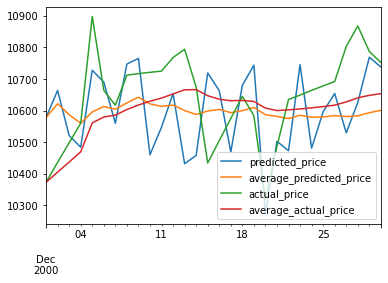

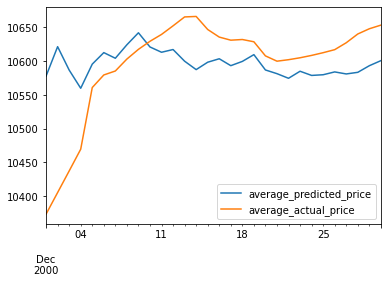

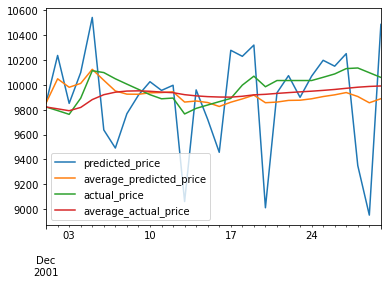

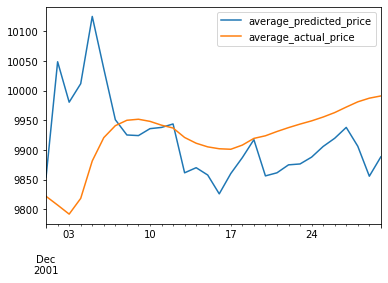

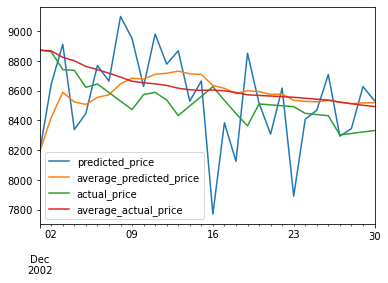

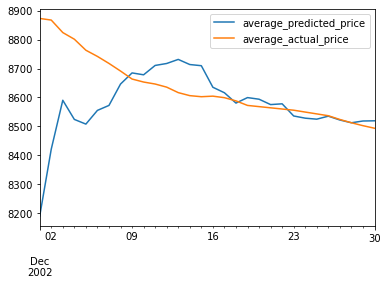

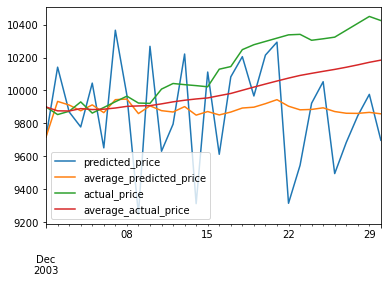

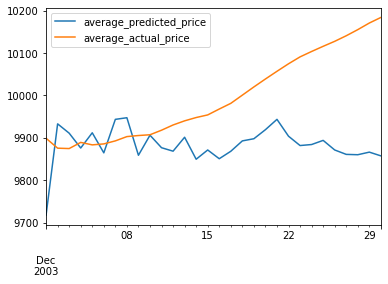

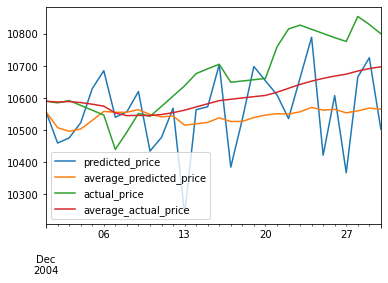

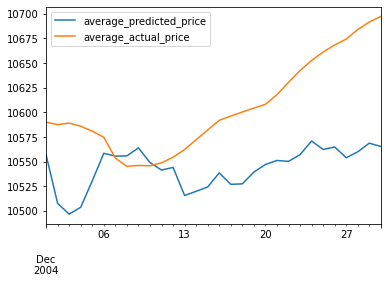

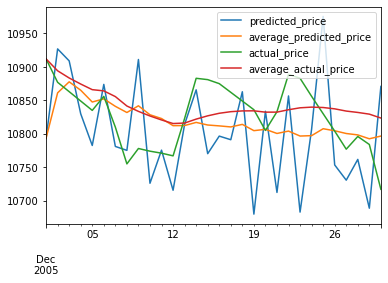

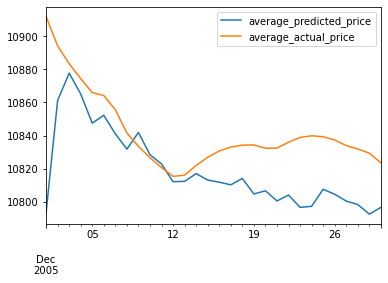

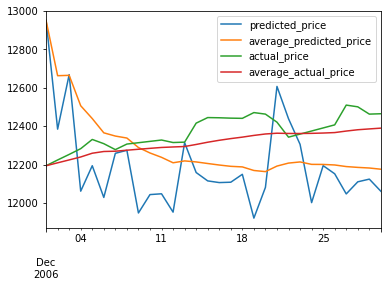

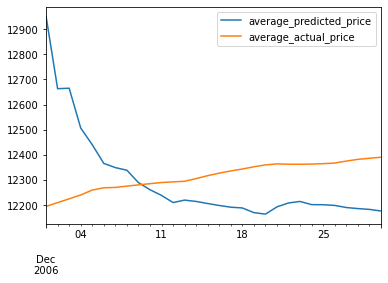

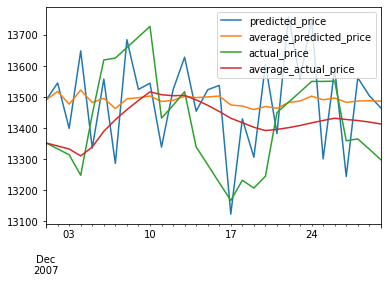

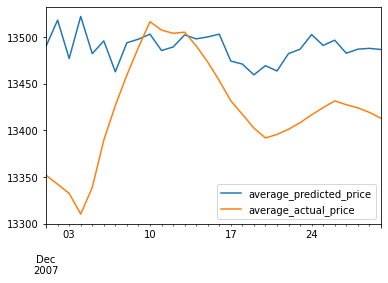

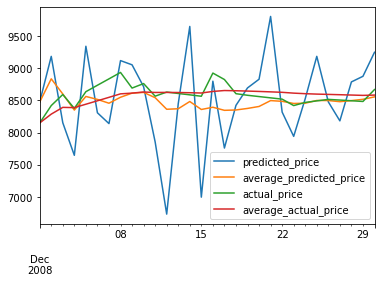

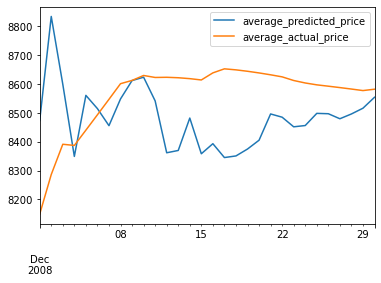

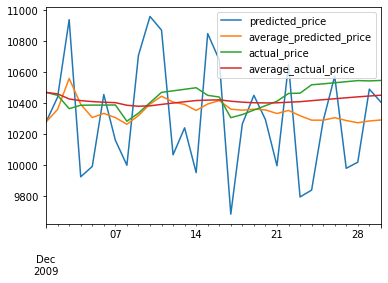

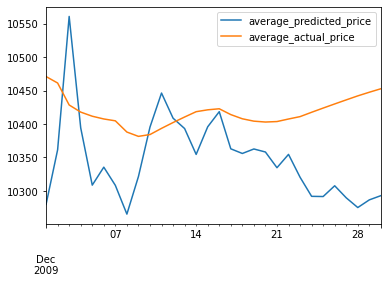

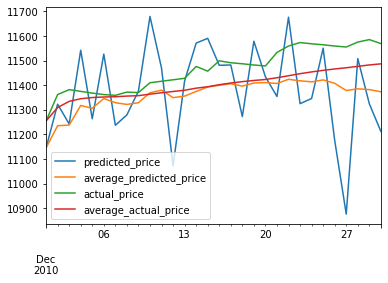

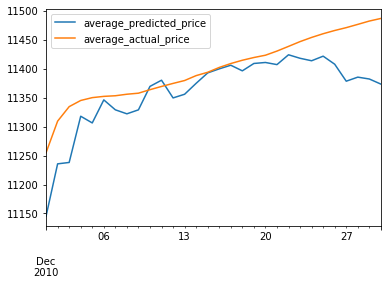

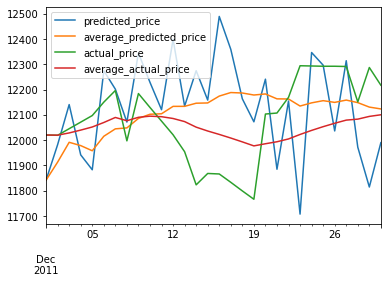

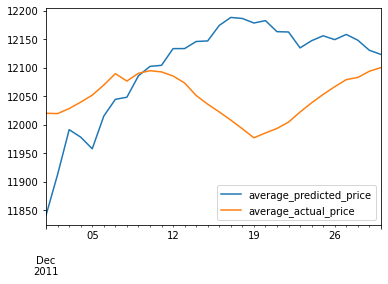

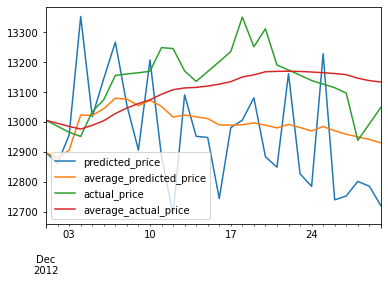

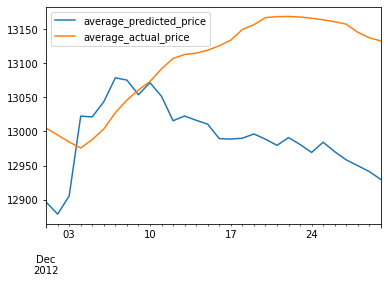

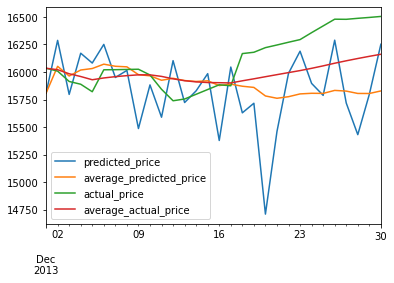

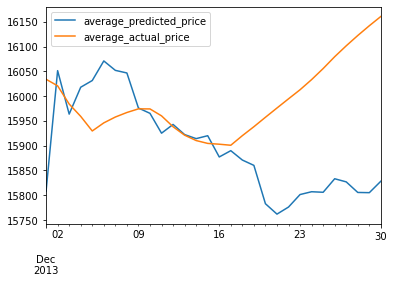

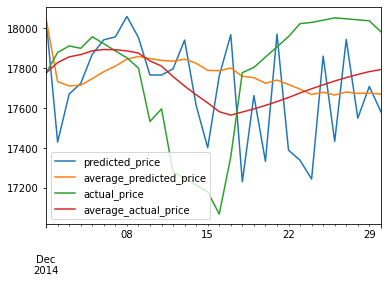

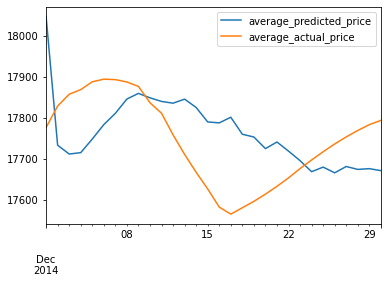

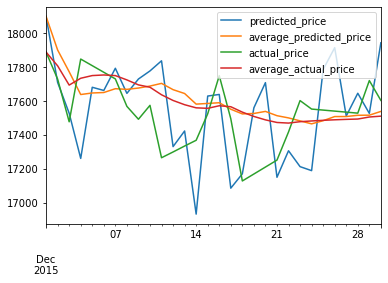

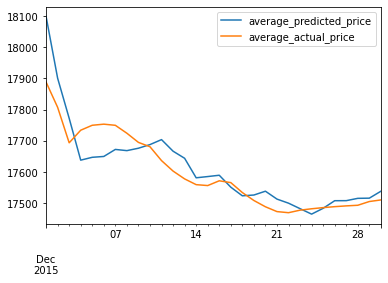

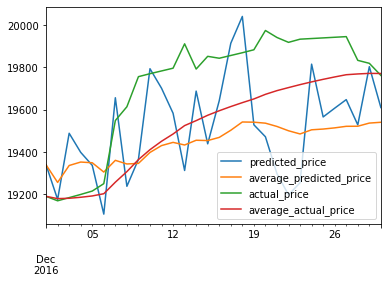

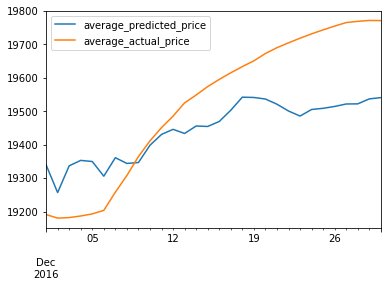

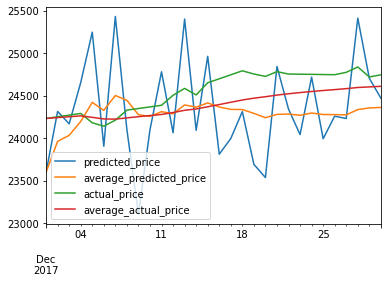

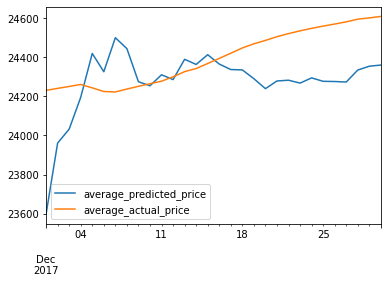

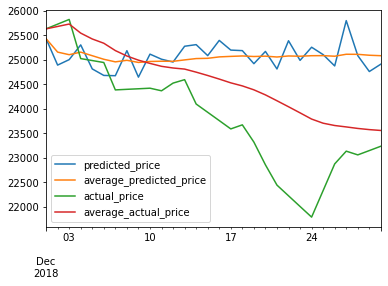

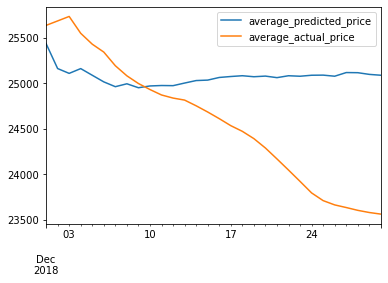

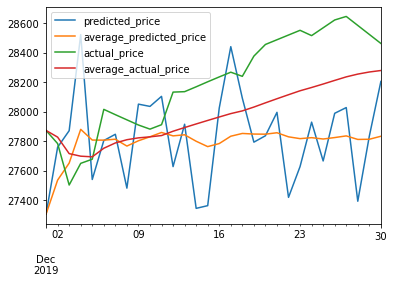

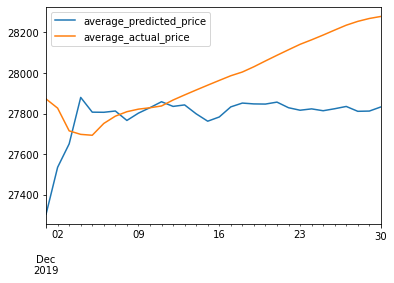

In [311]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
prediction_list = []
mae=[]
rmse=[]
r2=[]
for year in years:
    # Splitting the training and testing data
    #3CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-08-31'
    test_start_date = str(year) + '-09-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    #6CV
    
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    #12CV
    """
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-11-30'
    test_start_date = str(year) + '-12-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    """
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=7)
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    mae.append(metrics.mean_absolute_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    rmse.append(math.sqrt(metrics.mean_squared_error(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price'])))
    r2.append(metrics.r2_score(predictions_df_list['average_actual_price'],predictions_df_list['average_predicted_price']))
    #print("hi")
    
#     predictions_df_list.show()
maeFinal=mean(mae)
rmseFinal=mean(rmse)
r2Final=mean(r2)
print(maeFinal,rmseFinal,r2Final)
mae_vals.append(maeFinal)
rmse_vals.append(rmseFinal)
r2_vals.append(r2Final)
#     predictions_df_list.show()

In [312]:
models = ['3_SCV','6_SCV', '12_SCV']
tab = pd.DataFrame({'RandomForestRegressor': models, 'RMSE':rmse_vals, 'MAE': mae_vals, 'R2_Score': r2_vals})
tab.style.hide_index()

### MLP Classifier

In [313]:

mae_vals=[]
rmse_vals=[]
r2_vals=[]

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Owner\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`

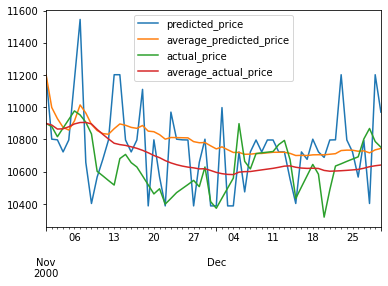

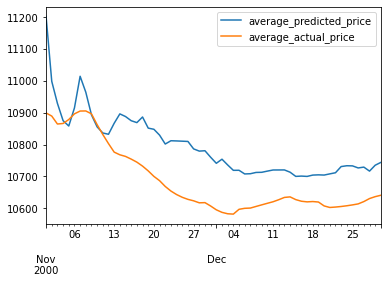

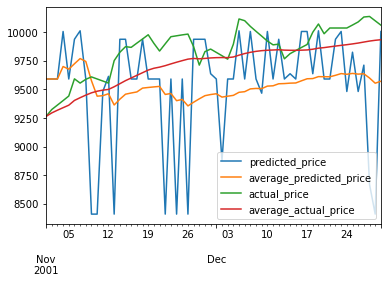

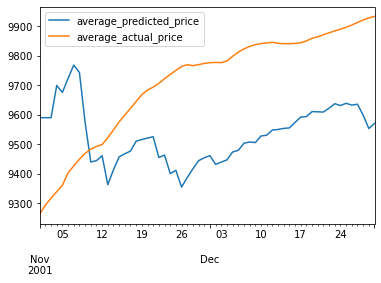

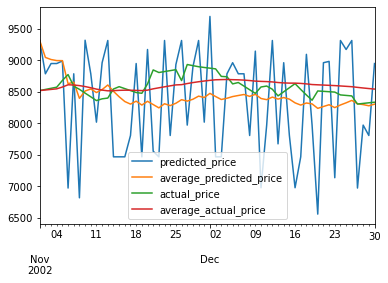

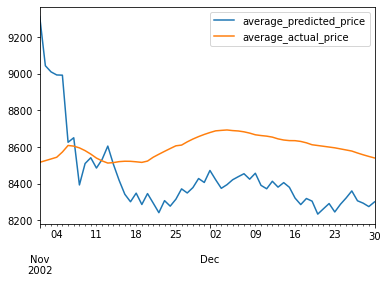

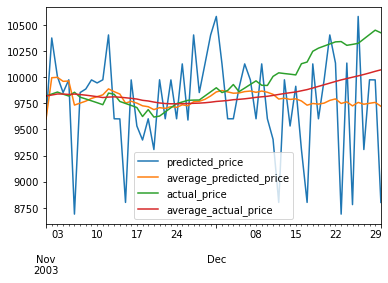

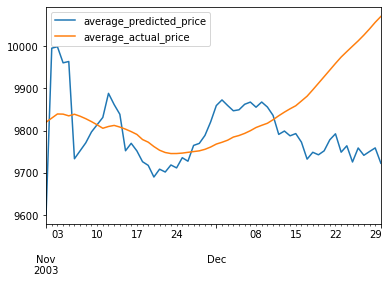

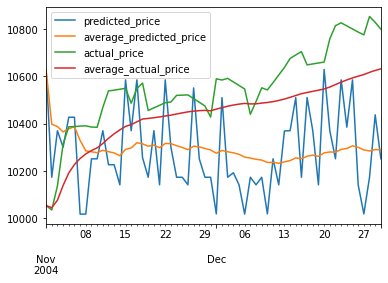

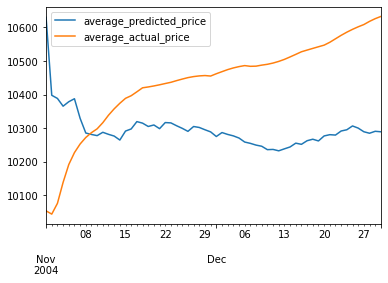

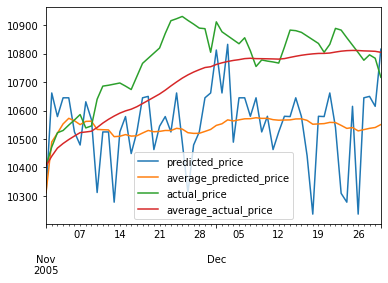

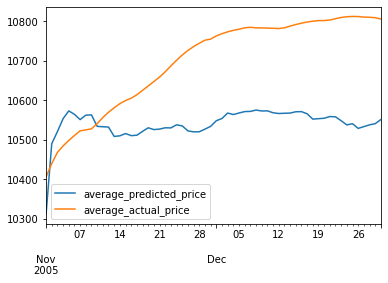

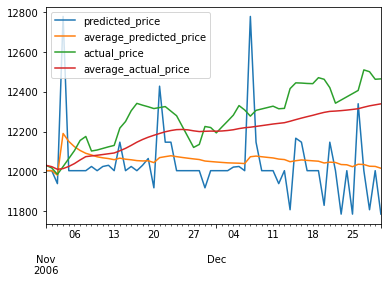

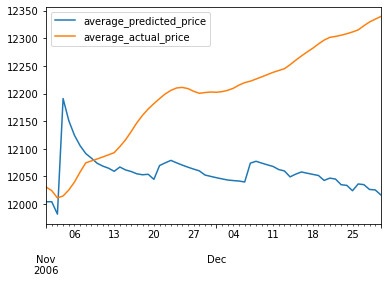

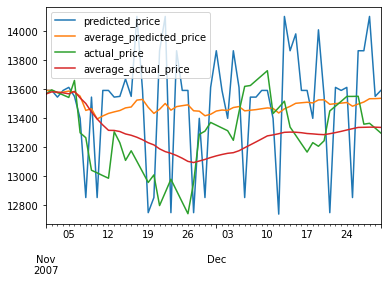

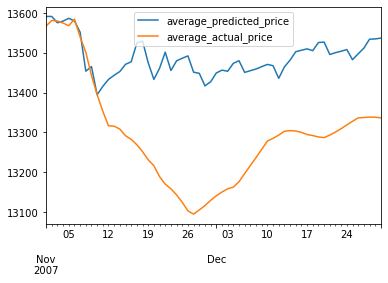

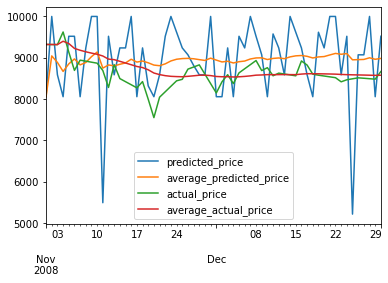

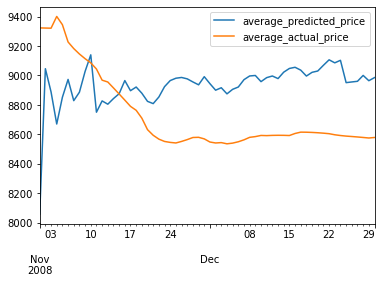

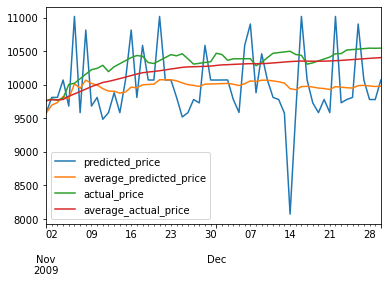

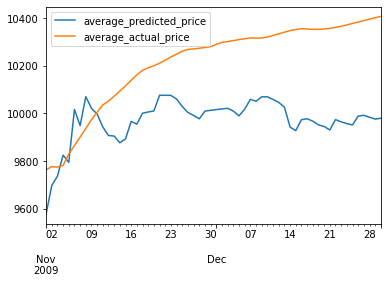

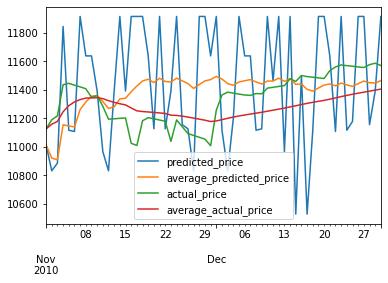

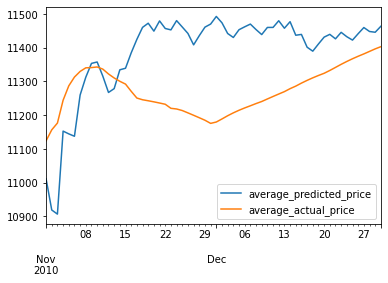

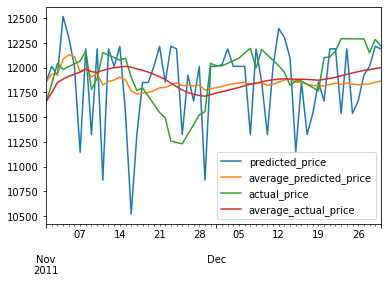

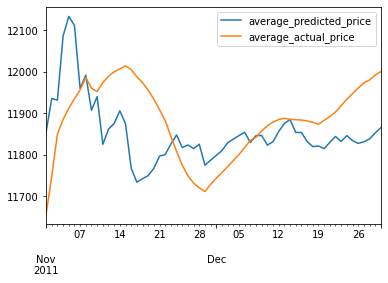

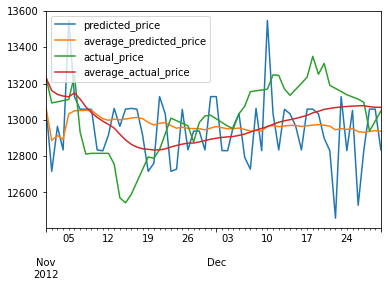

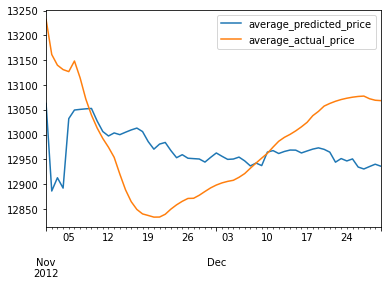

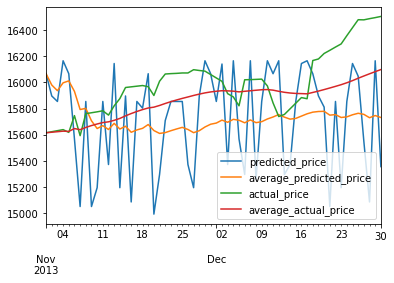

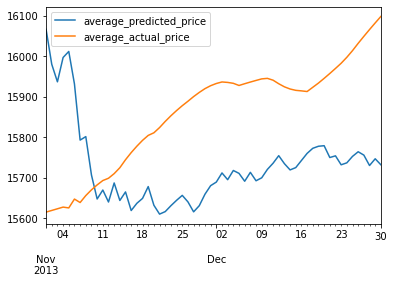

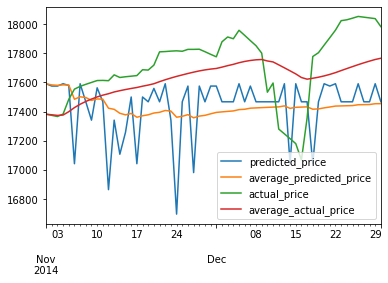

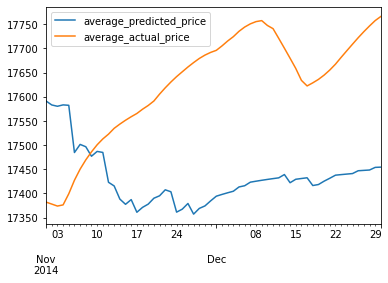

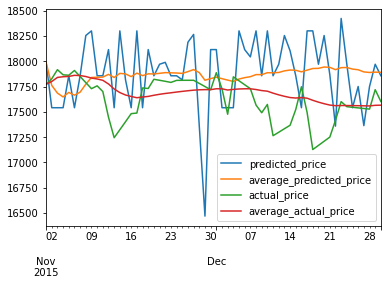

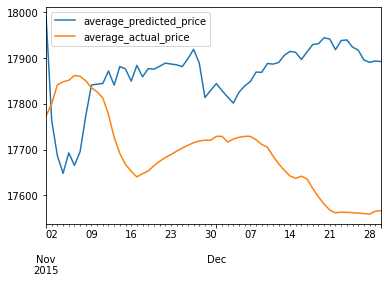

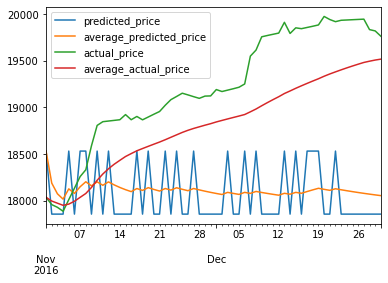

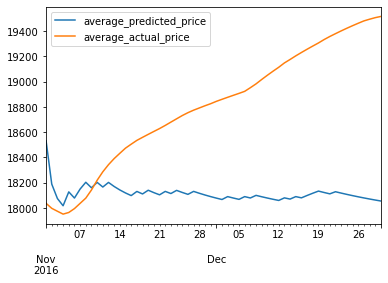

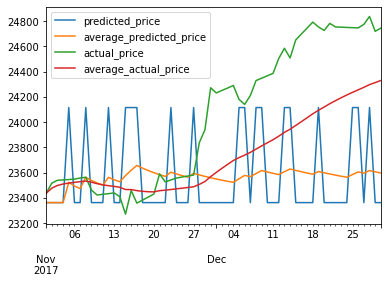

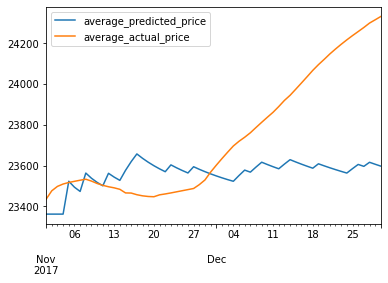

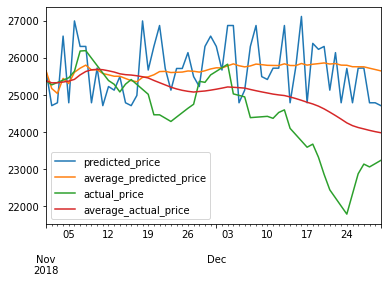

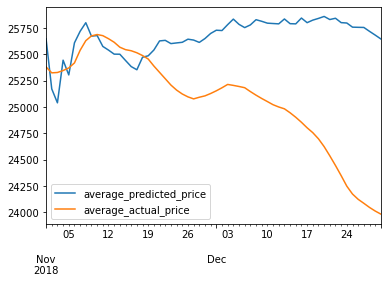

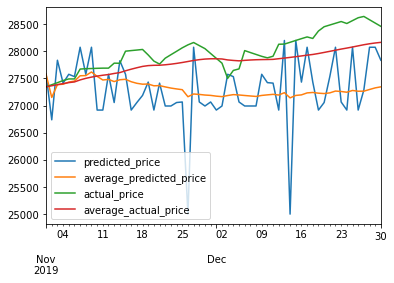

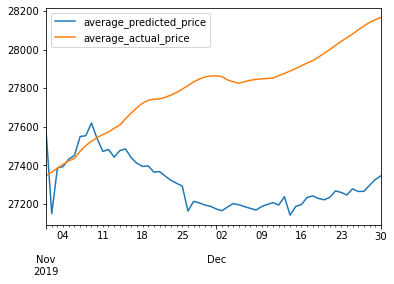

In [166]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,2017,2018,2019]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-30'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(ignore_na=False,span=60,min_periods=0,adjust=True).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()
    
#     predictions_df_list.show()

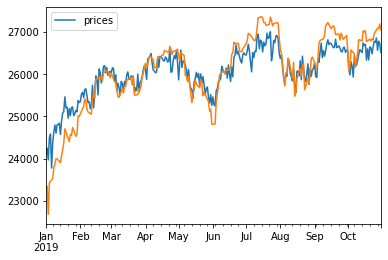

In [167]:

# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()